# `02-pandas2.ipynb`

## Grouping

In [72]:
import pandas as pd
import numpy as np

data = {
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '고객ID': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C', 'B', 'D'],
    '상품카테고리': ['전자제품', '의류', '가구', '전자제품', '의류', '식품', '가구', '식품', '전자제품', '의류'],
    '구매액': [150000, 75000, 220000, 95000, 82000, 45000, 180000, 35000, 120000, 62000],
    '배송지역': ['서울', '부산', '서울', '인천', '서울', '부산', '인천', '서울', '부산', '인천'],
    '할인율': [0.05, 0.1, 0, 0.2, 0.1, 0, 0.05, 0.15, 0.2, 0]
}

df = pd.DataFrame(data)
df

,주문번호,고객ID,상품카테고리,구매액,배송지역,할인율
0,1001,A,전자제품,150000,서울,0.05
1,1002,B,의류,75000,부산,0.10
2,1003,A,가구,220000,서울,0.00
3,1004,C,전자제품,95000,인천,0.20
4,1005,B,의류,82000,서울,0.10
5,1006,A,식품,45000,부산,0.00
6,1007,D,가구,180000,인천,0.05
7,1008,C,식품,35000,서울,0.15
8,1009,B,전자제품,120000,부산,0.20
9,1010,D,의류,62000,인천,0.00


In [19]:
# 기본 그룹 - 고객 별 구매액 총합
df.groupby('고객ID')['구매액'].sum()

# 그룹 객체
id_group = df.groupby('고객ID')

# 그룹 확인 (고객 ID들 그룹)
id_group.groups.keys()

# 특정 그룹 데이터 확인
id_group.get_group('A')

# 여러 col 으로 그룹핑 (Series)
multi_group = df.groupby(['고객ID', '상품카테고리'])['구매액'].sum()
# DF 변환
multi_group.to_frame()

# 1개 col(구매액)에 집계합수 여러개 적용
df.groupby('고객ID')['구매액'].agg(['sum', 'mean', 'count', 'min', 'max'])

# n개 col에 m개 집계함수
df.groupby('고객ID').agg({
    '구매액': ['sum', 'mean', 'count'],
    '할인율': ['mean', 'max']
})

# 사용자 정의 집계 함수
def discount_amount(price):
    return (price * df.loc[price.index, '할인율']).sum()

df.groupby('고객ID')['구매액'].agg([
    # AS, function
    ('총구매액', 'sum'),
    ('평균구매액', 'mean'),
    ('할인총액', discount_amount),
])


,총구매액,평균구매액,할인총액
고객ID,,,
A,415000,138333.333333,7500.0
B,277000,92333.333333,39700.0
C,130000,65000.000000,24250.0
D,242000,121000.000000,9000.0


In [73]:
# 집계 함수 응용
import pandas as pd
import numpy as np

# 샘플 데이터
df = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A001', 'A003', 'A002', 'A004', 'A003', 'A001', 'A002', 'A004'],
    '판매일자': pd.date_range('2023-01-01', periods=10),
    '판매수량': [5, 3, 7, 2, 4, 6, 3, 8, 5, 4],
    '판매금액': [50000, 30000, 70000, 25000, 40000, 65000, 30000, 80000, 50000, 45000],
    '반품수량': [0, 1, 0, 0, 0, 2, 1, 0, 0, 1],
    '고객평점': [4.5, 3.8, 4.2, 5.0, 4.0, 3.5, 4.2, 4.8, 3.9, 4.1]
})
df

,상품ID,판매일자,판매수량,판매금액,반품수량,고객평점
0,A001,2023-01-01,5,50000,0,4.5
1,A002,2023-01-02,3,30000,1,3.8
2,A001,2023-01-03,7,70000,0,4.2
3,A003,2023-01-04,2,25000,0,5.0
4,A002,2023-01-05,4,40000,0,4.0
5,A004,2023-01-06,6,65000,2,3.5
6,A003,2023-01-07,3,30000,1,4.2
7,A001,2023-01-08,8,80000,0,4.8
8,A002,2023-01-09,5,50000,0,3.9
9,A004,2023-01-10,4,45000,1,4.1


In [37]:
# 기본 집계
basic = df.groupby('상품ID').agg({
    '판매수량': ['sum', 'mean', 'count'],
    '판매금액': ['sum', 'mean'],
    '반품수량': ['sum'],
    '고객평점': ['mean']
})
print(basic)
print()

# 커스텀 함수
# 총 판매수량 대비 반품수량 비율
def return_rate(x):
    total_sold = df.loc[x.index, '판매수량'].sum()
    total_returned = df.loc[x.index, '반품수량'].sum()
    return total_returned / total_sold * 100 if total_sold > 0 else 0

custom = df.groupby('상품ID').agg({
    '판매수량': ['sum', 'count'],
    '반품수량': ['sum', return_rate],
})
print(custom)

     판매수량                    판매금액               반품수량 고객평점
      sum      mean count     sum          mean  sum mean
상품ID                                                     
A001   20  6.666667     3  200000  66666.666667    0  4.5
A002   12  4.000000     3  120000  40000.000000    1  3.9
A003    5  2.500000     2   55000  27500.000000    1  4.6
A004   10  5.000000     2  110000  55000.000000    3  3.8

     판매수량       반품수량            
      sum count  sum return_rate
상품ID                            
A001   20     3    0    0.000000
A002   12     3    1    8.333333
A003    5     2    1   20.000000
A004   10     2    3   30.000000


In [71]:
# 그룹별 순위 및 누적 계산
import pandas as pd
import numpy as np

# 샘플 데이터: 부서별 직원 실적
data = {
    '직원ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원', '오민지', '홍길동'],
    '부서': ['영업', '개발', '영업', '인사', '개발', '영업', '개발', '인사', '영업', '개발', '영업', '인사'],
    '월별실적': [120, 85, 95, 110, 75, 135, 95, 110, 115, 90, 125, 100],
    '고객평가': [4.5, 3.8, 4.2, 4.7, 3.9, 4.8, 4.1, 4.3, 4.5, 4.0, 4.6, 4.2]
}

df = pd.DataFrame(data)
print("부서별 직원 실적 데이터:")
df

부서별 직원 실적 데이터:


,직원ID,이름,부서,월별실적,고객평가
0,101,김철수,영업,120,4.5
1,102,이영희,개발,85,3.8
2,103,박민수,영업,95,4.2
3,104,정지영,인사,110,4.7
4,105,최동민,개발,75,3.9
5,106,강준호,영업,135,4.8
6,107,윤서연,개발,95,4.1
7,108,임태혁,인사,110,4.3
8,109,한미래,영업,115,4.5
9,110,송지원,개발,90,4.0


In [ ]:
# 그룹 내 순위 계산
dept_group = df.groupby('부서')

# 동일 순위가 있을 경우의 처리 방식
# rank_methods = ['average', 'min', 'max', 'dense', 'first']
# for method in rank_methods:
#     col_name = f'순위_{method}'
#     df[col_name] = df.groupby('부서')['월별실적'].rank(method=method, ascending=False)

# 부서별 월별 실적 랭킹(높은 사람부터)
df['부서순위_실적'] = dept_group['월별실적'].rank(method='dense', ascending=False)
df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적
0,101,김철수,영업,120,4.5,3.0
1,102,이영희,개발,85,3.8,3.0
2,103,박민수,영업,95,4.2,5.0
3,104,정지영,인사,110,4.7,1.0
4,105,최동민,개발,75,3.9,4.0
5,106,강준호,영업,135,4.8,1.0
6,107,윤서연,개발,95,4.1,1.0
7,108,임태혁,인사,110,4.3,1.0
8,109,한미래,영업,115,4.5,4.0
9,110,송지원,개발,90,4.0,2.0


In [ ]:
# 누적 합계 및 누적 통계
# 부서별 누적 실적 합계 -> acummulate

df['부서별_누적합계'] = df.groupby('부서')['월별실적'].cumsum()
df['부서별_누적최대'] = df.groupby('부서')['월별실적'].cummax()
df['부서별_누적평균'] = df.groupby('부서')['월별실적'].expanding().mean().reset_index(level=0, drop=True)

# 그룹별 비율 계산
# 부서별 총 실적 대비 개인 실적 비율
dept_group = df.groupby('부서')
df['부서총실적'] = dept_group['월별실적'].transform('sum')
df['부서기여도'] = df['월별실적'] / df['부서총실적']

# 복합응용
# 성과점수는 = 0.7 실적 + 0.3 평가 * 20
df['성과점수'] = df['월별실적'] * 0.7 + df['고객평가'] * 0.3 * 20
# 성과 점수 별 랭킹
df['부서순위_성과'] = dept_group['성과점수'].rank(method='dense', ascending=False)

def cal_bonus(row):
    # 10% 기본 보너스
    base_bonus = row['월별실적'] * 0.1
    rank =  row['부서순위_성과']
    if rank == 1:
        return base_bonus * 1.5
    elif rank == 2:
        return base_bonus * 1.3
    elif rank == 3:
        return base_bonus * 1.1
    else:
        return base_bonus
    
# 랭킹별 보너스 지금 함수
df['성과급'] = df.apply(cal_bonus, axis=1)
df


,직원ID,이름,부서,월별실적,고객평가,부서순위_실적,부서별_누적합계,부서별_누적최대,부서별_누적평균,부서총실적,부서기여도,성과점수,부서순위_성과,성과급
0,101,김철수,영업,120,4.5,3.0,120,120,120.000000,590,0.203390,111.0,3.0,13.20
1,102,이영희,개발,85,3.8,3.0,85,85,85.000000,345,0.246377,82.3,3.0,9.35
2,103,박민수,영업,95,4.2,5.0,215,120,107.500000,590,0.161017,91.7,5.0,NaN
3,104,정지영,인사,110,4.7,1.0,110,110,110.000000,320,0.343750,105.2,1.0,16.50
4,105,최동민,개발,75,3.9,4.0,160,85,80.000000,345,0.217391,75.9,4.0,NaN
5,106,강준호,영업,135,4.8,1.0,350,135,116.666667,590,0.228814,123.3,1.0,20.25
6,107,윤서연,개발,95,4.1,1.0,255,95,85.000000,345,0.275362,91.1,1.0,14.25
7,108,임태혁,인사,110,4.3,1.0,220,110,110.000000,320,0.343750,102.8,2.0,14.30
8,109,한미래,영업,115,4.5,4.0,465,135,116.250000,590,0.194915,107.5,4.0,NaN
9,110,송지원,개발,90,4.0,2.0,345,95,86.250000,345,0.260870,87.0,2.0,11.70


## 실습: 매출 데이터 그룹별 분석

In [94]:
# 실습: 매출 데이터 그룹별 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
np.random.seed(42)

# 날짜 생성 (2023년 전체)
dates = pd.date_range('2023-01-01', '2023-12-31')
n_records = 500

data = {
    '주문ID': np.arange(1001, 1001 + n_records),
    '주문일자': np.random.choice(dates, n_records),
    '고객ID': np.random.choice([f'CUST{i:03d}' for i in range(1, 101)], n_records),
    '상품ID': np.random.choice([f'PROD{i:03d}' for i in range(1, 51)], n_records),
    '카테고리': np.random.choice(['전자제품', '의류', '가구', '식품', '화장품', '도서', '스포츠'], n_records),
    '매출액': np.random.randint(10000, 500000, n_records),
    '수량': np.random.randint(1, 10, n_records),
    '지역': np.random.choice(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원'], n_records),
    '결제방법': np.random.choice(['신용카드', '현금', '체크카드', '휴대폰', '계좌이체'], n_records),
    '고객등급': np.random.choice(['일반', '실버', '골드', 'VIP'], n_records)
}

df = pd.DataFrame(data)
print(df.dtypes)
df.head()

주문ID             int64
주문일자    datetime64[ns]
고객ID            object
상품ID            object
카테고리            object
매출액              int32
수량               int32
지역              object
결제방법            object
고객등급            object
dtype: object


,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP


In [ ]:
# 검색후 하기
# 날짜 정보 추출 -> 컬럼 추가 ['주문년월', '요일', '주']

# 주문년월 컬럼 (예: '2023-04')
df['주문년월'] = df['주문일자'].dt.to_period('M').astype(str)  # df['주문일자'].dt.strftime('%Y-%m')
# 요일 컬럼 (예: '목요일')
df['요일'] = df['주문일자'].dt.day_name(locale='ko_KR')
# 주 컬럼 (1년 중 몇 번째 주인지)
df['주'] = df['주문일자'].dt.isocalendar().week

df

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급,주문년월,요일,주,단가
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드,2023-04,목요일,15,96224.750000
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP,2023-12,금요일,50,9569.285714
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반,2023-09,목요일,39,35801.444444
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버,2023-04,월요일,16,162235.000000
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP,2023-03,월요일,11,39579.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,2023-11-21,CUST095,PROD049,전자제품,44084,2,광주,체크카드,VIP,2023-11,화요일,47,22042.000000
496,1497,2023-01-04,CUST006,PROD017,화장품,261459,3,경기,체크카드,실버,2023-01,수요일,1,87153.000000
497,1498,2023-01-16,CUST066,PROD010,도서,120641,1,경기,계좌이체,실버,2023-01,월요일,3,120641.000000
498,1499,2023-10-07,CUST084,PROD049,전자제품,115111,8,인천,현금,실버,2023-10,토요일,40,14388.875000


In [151]:
# 단가 계산 
# 단가 컬럼 추가 (매출액/수량)
df['단가'] = df['매출액'] / df['수량']
df

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급,주문년월,요일,주,단가
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드,2023-04,목요일,15,96224.750000
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP,2023-12,금요일,50,9569.285714
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반,2023-09,목요일,39,35801.444444
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버,2023-04,월요일,16,162235.000000
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP,2023-03,월요일,11,39579.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1496,2023-11-21,CUST095,PROD049,전자제품,44084,2,광주,체크카드,VIP,2023-11,화요일,47,22042.000000
496,1497,2023-01-04,CUST006,PROD017,화장품,261459,3,경기,체크카드,실버,2023-01,수요일,1,87153.000000
497,1498,2023-01-16,CUST066,PROD010,도서,120641,1,경기,계좌이체,실버,2023-01,월요일,3,120641.000000
498,1499,2023-10-07,CUST084,PROD049,전자제품,115111,8,인천,현금,실버,2023-10,토요일,40,14388.875000


In [152]:
# 카테고리 별 매출 분석 
# 매출액 총합,평균,개수 / 수량 총합

df.groupby('카테고리').agg({
    '매출액': ['sum', 'mean', 'count'],
    '수량': ['sum'],
})

매출액                        수량
           sum           mean count  sum
카테고리                                    
가구    19263561  267549.458333    72  348
도서    17826814  254668.771429    70  374
스포츠   17729088  268622.545455    66  332
식품    16816186  254790.696970    66  299
의류    17971859  253124.774648    71  359
전자제품  19526279  256924.723684    76  358
화장품   20600588  260766.936709    79  386

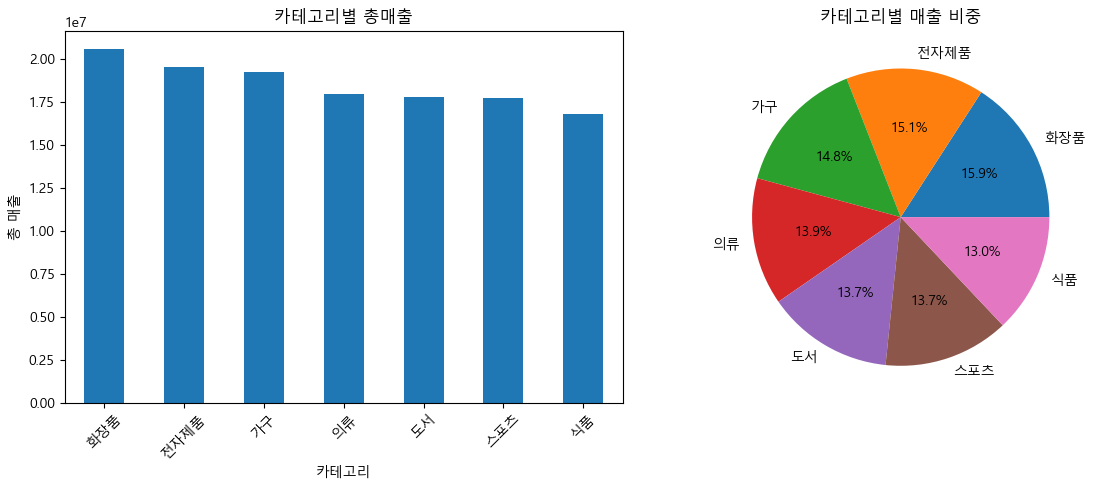

In [178]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 카테고리별 매출 비중 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
category_sum = df.groupby('카테고리')['매출액'].sum().sort_values(ascending=False)
category_sum.plot(kind='bar')
plt.title('카테고리별 총매출')
plt.ylabel('총 매출')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
category_sum.plot(kind='pie', autopct='%1.1f%%')
plt.title('카테고리별 매출 비중')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [182]:
# 월 별 매출 트렌드
# '주문년월' 컬럼으로 매출액 sum, 주문ID count, 단가 mean

monthly_sales = df.groupby('주문년월').agg({
    '매출액': 'sum',
    '주문ID': 'count',
    '단가': 'mean',
}).rename(columns={'주문ID': '주문건수'})
monthly_sales

,매출액,주문건수,단가
주문년월,,,
2023-01,7786750,31,68573.324552
2023-02,13558838,47,83141.030344
2023-03,4820044,23,67224.537095
2023-04,13329098,49,97647.609208
2023-05,12825903,51,88883.442134
2023-06,10302473,44,64922.530177
2023-07,11575996,37,107918.450397
2023-08,11604378,47,69333.936651
2023-09,11646019,45,76389.962522


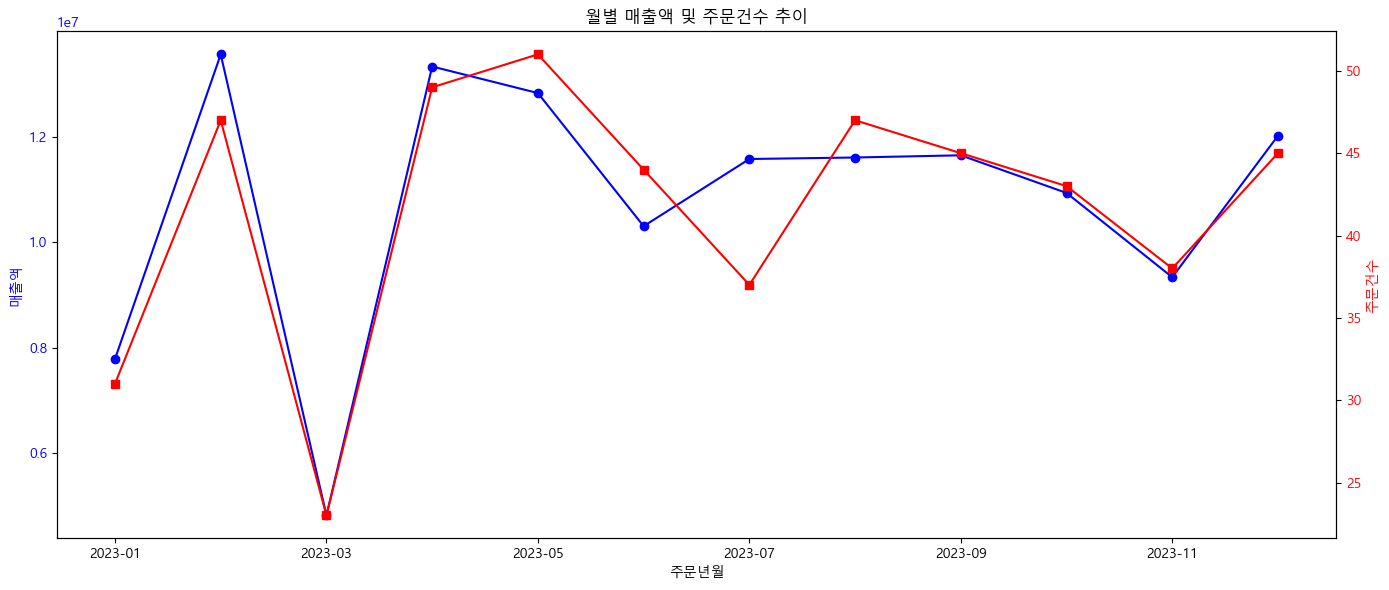

In [183]:
plt.figure(figsize=(14, 6))

# 매출액 추이
ax1 = plt.subplot(111)
monthly_sales['매출액'].plot(kind='line', marker='o', ax=ax1, color='blue')
ax1.set_title('월별 매출액 및 주문건수 추이')
ax1.set_ylabel('매출액', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 주문건수 추이 (보조 축)
ax2 = ax1.twinx()
monthly_sales['주문건수'].plot(kind='line', marker='s', ax=ax2, color='red')
ax2.set_ylabel('주문건수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [155]:
# 지역 & 카테고리 별 매출 분석
regional_df = df.groupby(['지역', '카테고리'])['매출액'].sum().unstack()
regional_df

카테고리,가구,도서,스포츠,식품,의류,전자제품,화장품
지역,,,,,,,
강원,2567149,2229004,3236879,1546551,1961318,3064388,2350914
경기,1845589,1547956,2396558,2700479,3636189,2385742,3001775
광주,2583543,3290899,1543411,2609787,2337267,1158681,1920285
대구,2068333,1395664,1997663,1527438,2030142,2824580,2990911
대전,2806642,1400616,1817291,2557407,1321115,1665455,2186323
부산,1598356,1128322,1256823,749149,1827427,1714636,2565236
서울,2302258,2822680,2305854,1513749,2568012,1945582,1193348
울산,1396916,2365056,1497102,1385252,228601,1897187,2025993
인천,2094775,1646617,1677507,2226374,2061788,2870028,2365803


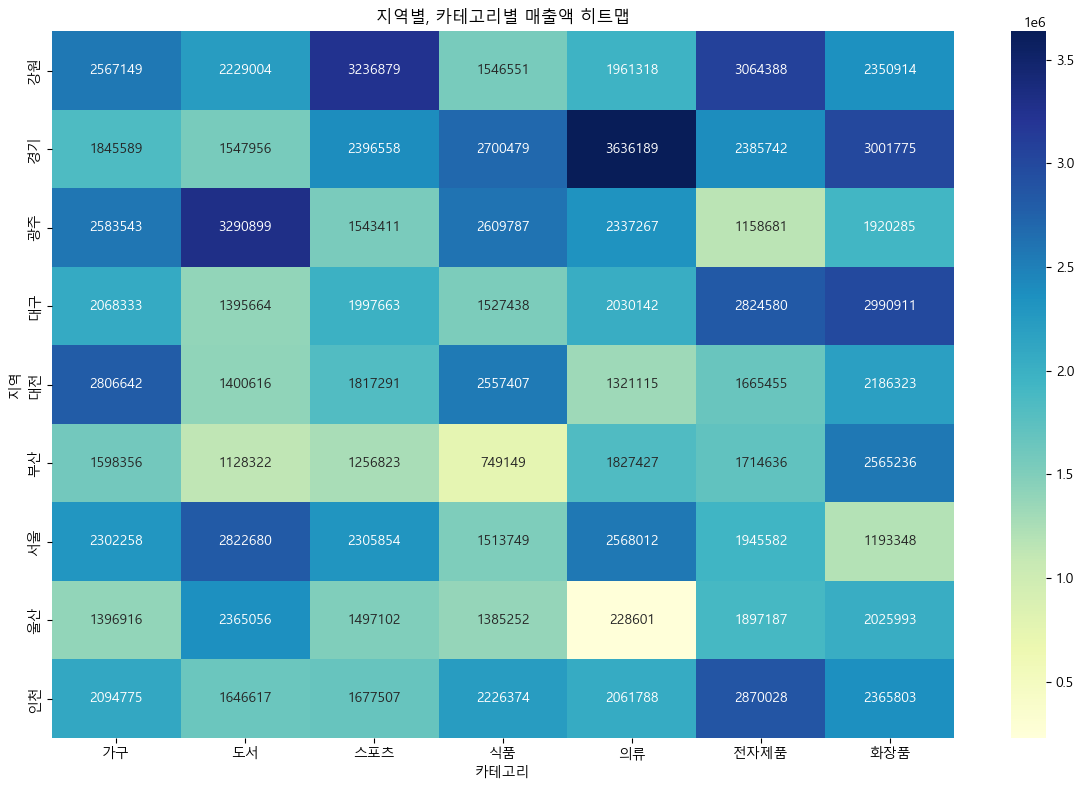

In [184]:
# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(regional_df, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('지역별, 카테고리별 매출액 히트맵')
plt.tight_layout()
plt.show()

In [198]:
# 요일 별 고객 등급별 매출 패턴

# 요일의 순서 지정
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['요일'] = pd.Categorical(df['요일'], categories=day_order, ordered=True)

day_grade_sales = df.groupby(['요일', '고객등급'])['매출액'].sum().unstack()
day_grade_sales[['VIP']]

C:\Users\amy\AppData\Local\Temp\ipykernel_7112\2186800465.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_grade_sales = df.groupby(['요일', '고객등급'])['매출액'].sum().unstack()


고객등급,VIP
요일,
월요일,6182434
화요일,4955018
수요일,3323716
목요일,5066444
금요일,2998646
토요일,4298206
일요일,4838696


<Figure size 1400x700 with 0 Axes>

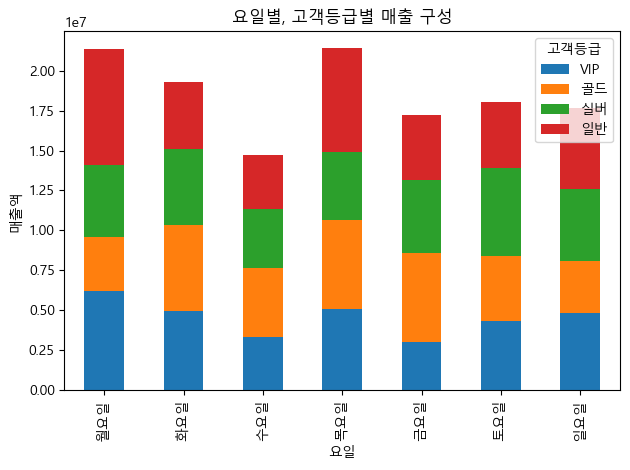

In [185]:
# 시각화
plt.figure(figsize=(14, 7))
day_grade_sales.plot(kind='bar', stacked=True)
plt.title('요일별, 고객등급별 매출 구성')
plt.ylabel('매출액')
plt.legend(title='고객등급')
plt.tight_layout()
plt.show()

In [166]:
# 결제방법 별 분석 및 고객 행동 (매출액-sum mean count, 단가-mean)

total_sales = df['매출액'].sum()

df.groupby('결제방법').agg({
    '매출액': ['sum', 'mean', 'count', 
            ('ratio', lambda x: x.sum() / total_sales * 100)],
    '단가': ['mean'],
})

매출액                                            단가
           sum           mean count      ratio          mean
결제방법                                                        
계좌이체  26376866  251208.247619   105  20.331440  81029.835393
신용카드  25514730  260354.387755    98  19.666900  89773.784973
체크카드  26536652  260163.254902   102  20.454603  66063.697837
현금    25579043  272117.478723    94  19.716473  81782.442815
휴대폰   25727084  254723.603960   101  19.830584  84024.975216

In [173]:
# 고객ID 별 구매 패턴 (매출액 sum mean count, 구매한 고유 상품 수, 구매한 고유 카테고리 수)
df.groupby('고객ID').agg({
    '매출액': ['sum','mean','count'],
    '상품ID': 'nunique',
    '카테고리': 'nunique',
}).sort_values([('매출액', 'sum'), ('상품ID', 'nunique')], ascending=False)

# sort_values(['a', 'b']) => ORDER BY a, b => 단일 인덱스 col
# sort_values(('a', 'sum')) => col 'a', agg 'sum' 값을 기준으로 정렬 => 멀티 인덱스 col

매출액                         상품ID    카테고리
             sum           mean count nunique nunique
고객ID                                                 
CUST092  2814587  255871.545455    11      11       5
CUST017  2814138  281413.800000    10      10       6
CUST005  2709222  338652.750000     8       8       5
CUST026  2318957  331279.571429     7       7       4
CUST023  2187607  312515.285714     7       7       5
...          ...            ...   ...     ...     ...
CUST060   355454  355454.000000     1       1       1
CUST048   336250  336250.000000     1       1       1
CUST011   206733  206733.000000     1       1       1
CUST068   117414   58707.000000     2       2       1
CUST097    39165   39165.000000     1       1       1

[100 rows x 5 columns]

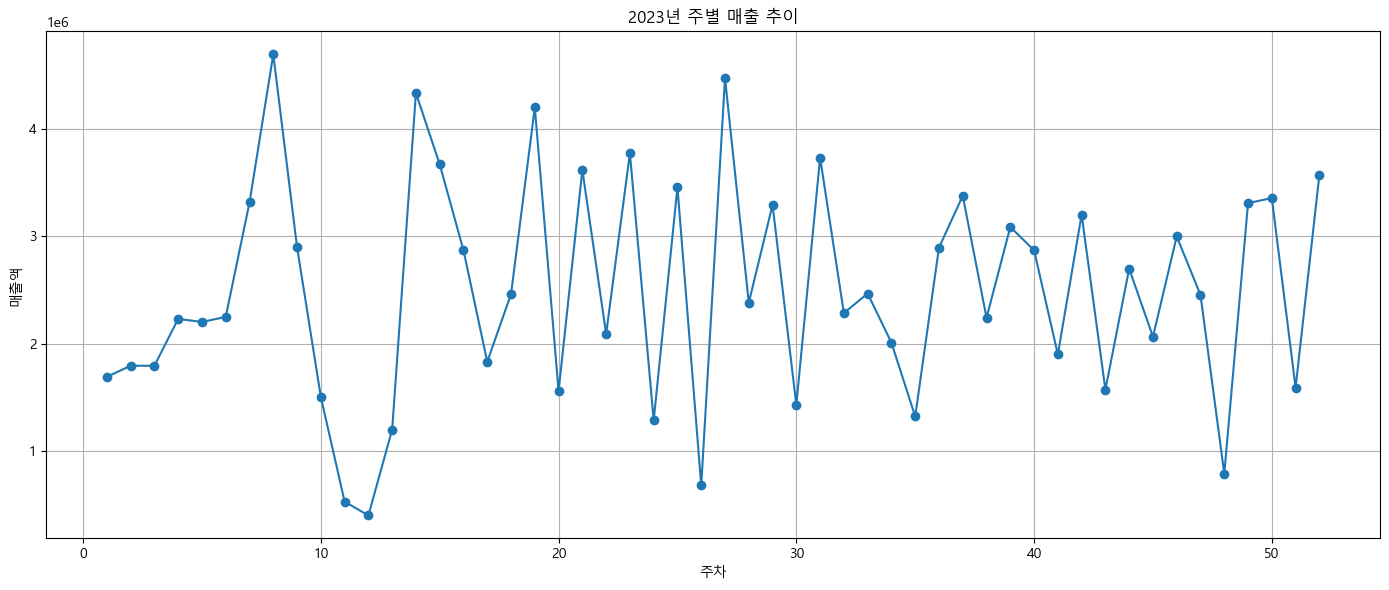

In [186]:
# 주별 매출 추이
weekly_sales = df.groupby('주')['매출액'].sum()

# 시각화
plt.figure(figsize=(14, 6))
weekly_sales.plot(kind='line', marker='o')
plt.title('2023년 주별 매출 추이')
plt.xlabel('주차')
plt.ylabel('매출액')
plt.grid(True)
plt.tight_layout()
plt.show()

In [188]:
# 매출 TOP 10 상품

# 정렬 -> 위 10개
df.groupby('상품ID')['매출액'].sum().sort_values(ascending=False).head(10)

# 상위 10개만
top_products = df.groupby('상품ID')['매출액'].sum().nlargest(10)
top_products

상품ID
PROD040    4878382
PROD029    4260616
PROD038    3825127
PROD047    3793126
PROD009    3737512
PROD033    3645223
PROD010    3625484
PROD017    3608202
PROD036    3543357
PROD026    3516412
Name: 매출액, dtype: int32

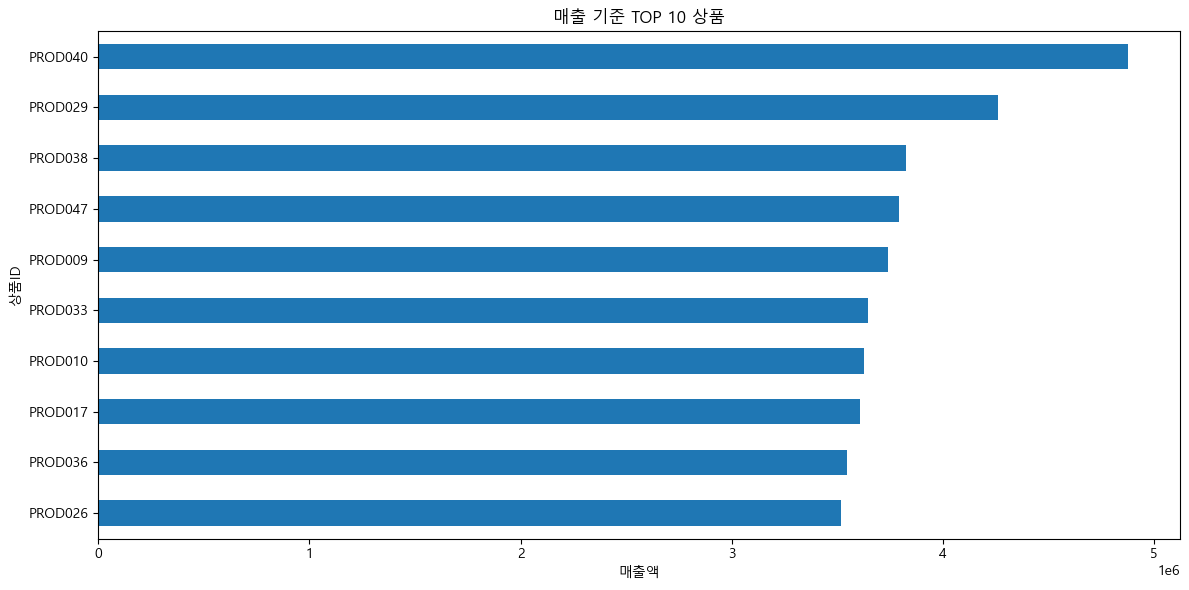

In [189]:
plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind='barh')
plt.title('매출 기준 TOP 10 상품')
plt.xlabel('매출액')
plt.tight_layout()
plt.show()

## 데이터 결합 (merging)
1. 데이터 단순 결합 (행 결합)
2. 데이터 병합
3. Index 기준 Join

In [192]:
# 데이터 병합 (merge)

products = pd.DataFrame({
    '상품ID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    '상품명': ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커'],
    '가격': [1200000, 850000, 500000, 150000, 75000],
    '카테고리': ['컴퓨터', '모바일', '모바일', '음향기기', '음향기기']
})

orders = pd.DataFrame({
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006],
    '고객ID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C002'],
    '상품ID': ['P001', 'P002', 'P003', 'P002', 'P005', 'P006'],
    '수량': [1, 2, 1, 1, 3, 2],
    '주문일자': ['2023-01-05', '2023-01-10', '2023-01-15', '2023-01-20', '2023-01-25', '2023-01-30']
})


print(products)
print(orders)
# 기본 병합 (Inner Join)
pd.merge(orders, products, on='상품ID')

# Outer Join
pd.merge(orders, products, on='상품ID', how='outer')

# Left Join
pd.merge(orders, products, on='상품ID', how='left')

# Right Join
pd.merge(orders, products, on='상품ID', how='right')

   상품ID   상품명       가격  카테고리
0  P001   노트북  1200000   컴퓨터
1  P002  스마트폰   850000   모바일
2  P003   태블릿   500000   모바일
3  P004   헤드폰   150000  음향기기
4  P005   스피커    75000  음향기기
   주문번호  고객ID  상품ID  수량        주문일자
0  1001  C001  P001   1  2023-01-05
1  1002  C002  P002   2  2023-01-10
2  1003  C003  P003   1  2023-01-15
3  1004  C001  P002   1  2023-01-20
4  1005  C004  P005   3  2023-01-25
5  1006  C002  P006   2  2023-01-30


,주문번호,고객ID,상품ID,수량,주문일자,상품명,가격,카테고리
0,1001.0,C001,P001,1.0,2023-01-05,노트북,1200000,컴퓨터
1,1002.0,C002,P002,2.0,2023-01-10,스마트폰,850000,모바일
2,1004.0,C001,P002,1.0,2023-01-20,스마트폰,850000,모바일
3,1003.0,C003,P003,1.0,2023-01-15,태블릿,500000,모바일
4,NaN,NaN,P004,NaN,NaN,헤드폰,150000,음향기기
5,1005.0,C004,P005,3.0,2023-01-25,스피커,75000,음향기기


In [193]:
customers = pd.DataFrame({
    'ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민'],
    '등급': ['VIP', '골드', '실버', '골드', '브론즈']
})

# 열 이름이 다르면?
pd.merge(
    orders, 
    customers, 
    left_on='고객ID',  # orders 데이터프레임의 열 이름
    right_on='ID',    # customers 데이터프레임의 열 이름
    how='inner'
)

,주문번호,고객ID,상품ID,수량,주문일자,ID,이름,등급
0,1001,C001,P001,1,2023-01-05,C001,김철수,VIP
1,1002,C002,P002,2,2023-01-10,C002,이영희,골드
2,1003,C003,P003,1,2023-01-15,C003,박민수,실버
3,1004,C001,P002,1,2023-01-20,C001,김철수,VIP
4,1005,C004,P005,3,2023-01-25,C004,정지영,골드
5,1006,C002,P006,2,2023-01-30,C002,이영희,골드


In [194]:
# 샘플 데이터셋 생성
# 1. 고객 정보 데이터
customers = pd.DataFrame({
    '고객ID': [f'CUST{i:03d}' for i in range(1, 11)],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원'],
    '성별': ['남', '여', '남', '여', '남', '남', '여', '남', '여', '여'],
    '연령대': ['30대', '20대', '40대', '30대', '50대', '20대', '40대', '30대', '20대', '50대'],
    '가입일자': pd.date_range('2023-01-01', periods=10, freq='3D'),
    '지역': ['서울', '부산', '서울', '인천', '대구', '서울', '부산', '인천', '서울', '대구']
})

# 2. 주문 정보 데이터
np.random.seed(42)
n_orders = 50

orders = pd.DataFrame({
    '주문번호': [f'ORD{i:04d}' for i in range(1, n_orders+1)],
    '고객ID': np.random.choice(customers['고객ID'], n_orders),
    '주문일자': pd.date_range('2023-01-05', periods=n_orders, freq='2D'),
    '결제방법': np.random.choice(['신용카드', '체크카드', '계좌이체', '간편결제'], n_orders),
    '배송상태': np.random.choice(['배송완료', '배송중', '주문확인', '배송지연'], n_orders, p=[0.7, 0.15, 0.1, 0.05])
})

# 3. 주문 상세 정보 데이터
n_details = 80
products = ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커', '키보드', '마우스', '모니터']
categories = ['전자제품', '컴퓨터', '주변기기', '음향기기']

order_details = pd.DataFrame({
    '상세번호': [f'ITEM{i:04d}' for i in range(1, n_details+1)],
    '주문번호': np.random.choice(orders['주문번호'], n_details),
    '상품명': np.random.choice(products, n_details),
    '카테고리': np.random.choice(categories, n_details),
    '수량': np.random.randint(1, 5, n_details),
    '가격': np.random.choice([50000, 100000, 150000, 800000, 1200000, 1500000], n_details),
    '할인율': np.random.choice([0, 0.1, 0.2, 0.3], n_details)
})

# 4. 배송 정보 데이터
shipping = pd.DataFrame({
    '주문번호': orders['주문번호'].unique(),
    '배송사': np.random.choice(['A택배', 'B물류', 'C익스프레스'], len(orders['주문번호'].unique())),
    '배송비': np.random.choice([0, 2500, 5000], len(orders['주문번호'].unique())),
    '출고일자': pd.date_range('2023-01-06', periods=len(orders['주문번호'].unique()), freq='2D')
})

# 5. 고객 만족도 데이터 (일부 주문에 대해서만)
satisfaction_orders = np.random.choice(orders['주문번호'], size=30, replace=False)
satisfaction = pd.DataFrame({
    '주문번호': satisfaction_orders,
    '만족도': np.random.randint(1, 6, 30),
    '리뷰': np.random.choice(['긍정', '중립', '부정'], 30, p=[0.6, 0.3, 0.1]),
    '리뷰일자': pd.date_range('2023-01-15', periods=30, freq='3D')
})